# EDA (Exploratory Data Analysis) del dataset de los viajes de los taxis amarillos durante el mes de septiembre de 2024

## Paso 0: Importar librerias necesarias para el EDA y cargar el dataset que será analizado.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Pandas para el manejo de la data.
* Matplotlib y Seaborn para la visualizacion de los gráficos pertinentes.

In [2]:
raw_yellow_tripdata = pd.read_parquet('../assets/Datasets/yellow_tripdata_2024-09.parquet')
raw_yellow_tripdata.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-09-01 00:05:51,2024-09-01 00:45:03,1.0,9.80,1.0,N,138,48,1,47.8,10.25,0.5,13.30,6.94,1.0,79.79,2.5,1.75
1,1,2024-09-01 00:59:35,2024-09-01 01:03:43,1.0,0.50,1.0,N,140,141,1,5.1,3.50,0.5,3.00,0.00,1.0,13.10,2.5,0.00
2,2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.0,2.29,1.0,N,238,152,2,13.5,1.00,0.5,0.00,0.00,1.0,16.00,0.0,0.00
3,2,2024-09-01 00:31:00,2024-09-01 00:46:52,1.0,5.20,1.0,N,93,130,1,24.7,1.00,0.5,4.55,0.00,1.0,31.75,0.0,0.00
4,2,2024-09-01 00:11:57,2024-09-01 00:30:41,2.0,2.26,1.0,N,79,231,1,17.0,1.00,0.5,4.40,0.00,1.0,26.40,2.5,0.00


El presente análisis se realizará sobre una pequeña muestra de los viajes (sept-2024) para observar la calidad de los datos recabados.

# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

In [3]:
raw_yellow_tripdata.shape

(3633030, 19)

El dataset contiene 3.633.030 filas, que representan los viajes realizados durante el mes de septiembre de 2024, y 19 columnas

In [4]:
raw_yellow_tripdata.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

En líneas generales, la informacion en las columnas de este dataset contienen lo siguiente:

* Proveedor tecnológico que generó el viaje y suministró la data (VendorID).
* Hora y fecha donde comenzó y terminó el viaje (tpep_pickup_datetime y tpep_dropoff_datetime).
* Numero de pasajeros reportado por el conductor (passenger_count).
* Distance recorrida durante el viaje (trip_distance).
* Tipo de tarifa aplicada al terminar el viaje (RatecodeID).
* Si la informacion del viaje fue suministrada al momento, o si fue almacenada en memoria del vehiculo por no tener conexion con el servidor (store_and_fwd_flag).
* Zona TLC donde comenzó y terminó el viaje (PULocationID y DOLocationID).
* Forma de pago del pasajero (payment_type)
* Tarifa base del viaje (fare_amount)
* Cargos extra asociados al viaje (extra, mta_tax, tolls_amount, improvement_surcharge, congestion_surcharge y Airport_fee)
* Propina (tip_amount)
* Tarifa total pagada por el pasajero (total_amount)

En resumen, se tiene informacion detallada sobre todos los viajes realizados durante el mes de septiembre de 2024 que incluyen principalmente tiempo, distancia, ubicaciones y costo del viaje.

In [5]:
raw_yellow_tripdata.sort_values(by=['tpep_pickup_datetime'])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2931345,2,2008-12-31 23:03:46,2009-01-01 20:25:11,1.0,0.71,1.0,N,163,237,2,7.2,1.0,0.5,0.00,0.00,1.0,12.20,2.5,0.00
317822,2,2008-12-31 23:05:26,2009-01-01 19:10:54,1.0,17.86,2.0,N,132,100,1,70.0,5.0,0.5,17.54,6.94,1.0,105.23,2.5,1.75
1768175,2,2009-01-01 14:02:23,2009-01-01 14:28:23,2.0,2.05,1.0,N,68,230,1,22.6,0.0,0.5,6.65,0.00,1.0,33.25,2.5,0.00
2168,2,2024-08-31 22:27:55,2024-08-31 22:51:40,1.0,7.77,1.0,N,141,235,1,34.5,1.0,0.5,7.90,0.00,1.0,47.40,2.5,0.00
2169,2,2024-08-31 23:16:36,2024-08-31 23:36:03,1.0,3.58,1.0,N,166,237,1,21.9,1.0,0.5,5.38,0.00,1.0,32.28,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121196,2,2024-10-01 18:55:43,2024-10-01 19:48:40,1.0,19.01,2.0,N,132,142,1,70.0,5.0,0.5,17.54,6.94,1.0,105.23,2.5,1.75
3126922,2,2024-10-01 19:42:58,2024-10-01 19:50:35,1.0,1.52,1.0,N,141,236,1,9.3,2.5,0.5,3.16,0.00,1.0,18.96,2.5,0.00
3126923,2,2024-10-01 19:57:24,2024-10-01 20:02:53,1.0,0.72,1.0,N,237,163,1,7.2,2.5,0.5,2.74,0.00,1.0,16.44,2.5,0.00
3133259,2,2024-10-01 20:58:22,2024-10-01 21:16:12,1.0,3.01,1.0,N,186,148,1,18.4,1.0,0.5,4.68,0.00,1.0,28.08,2.5,0.00


Se observa que el dataset tiene algunos valores inesperados, entre ellos unos correspondientes a años que no son 2024, y otros que corresponden a un mes que no es septiembre. A continuación se observará en mayor detalle estos valores.

In [6]:
raw_yellow_tripdata[raw_yellow_tripdata['tpep_pickup_datetime'].dt.year!=2024]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
317822,2,2008-12-31 23:05:26,2009-01-01 19:10:54,1.0,17.86,2.0,N,132,100,1,70.0,5.0,0.5,17.54,6.94,1.0,105.23,2.5,1.75
1768175,2,2009-01-01 14:02:23,2009-01-01 14:28:23,2.0,2.05,1.0,N,68,230,1,22.6,0.0,0.5,6.65,0.00,1.0,33.25,2.5,0.00
2931345,2,2008-12-31 23:03:46,2009-01-01 20:25:11,1.0,0.71,1.0,N,163,237,2,7.2,1.0,0.5,0.00,0.00,1.0,12.20,2.5,0.00


Se tiene que hay 3 valores que no son del año 2024, por lo que podemos considerarlos erroneos ya que no deberian estar en este dataset. Se procederá a eliminarlos.

In [7]:
raw_yellow_tripdata = raw_yellow_tripdata[raw_yellow_tripdata['tpep_pickup_datetime'].dt.year==2024].reset_index()
raw_yellow_tripdata.shape

(3633027, 20)

El numero de filas indica que los datos erróneos han sido eliminados correctamente.

In [8]:
raw_yellow_tripdata[raw_yellow_tripdata['tpep_pickup_datetime'].dt.month!=9]

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
117,117,2,2024-08-31 23:58:35,2024-09-01 00:11:49,1.0,2.01,1.0,N,164,148,1,14.2,1.0,0.5,2.00,0.00,1.0,21.20,2.5,0.00
249,249,2,2024-08-31 23:54:44,2024-08-31 23:57:27,1.0,0.25,1.0,N,231,231,1,4.4,1.0,0.5,1.88,0.00,1.0,11.28,2.5,0.00
261,261,2,2024-08-31 23:57:52,2024-09-01 00:29:43,1.0,18.05,2.0,N,132,42,1,70.0,0.0,0.5,12.03,6.94,1.0,92.22,0.0,1.75
308,308,2,2024-08-31 23:54:28,2024-09-01 00:06:43,1.0,1.23,1.0,N,230,162,2,12.1,1.0,0.5,0.00,0.00,1.0,17.10,2.5,0.00
359,359,2,2024-08-31 23:41:24,2024-09-01 00:01:24,1.0,5.44,1.0,N,100,42,1,25.4,1.0,0.5,2.00,0.00,1.0,32.40,2.5,0.00
366,366,2,2024-08-31 23:31:22,2024-08-31 23:49:22,2.0,4.63,1.0,N,79,262,2,21.9,1.0,0.5,0.00,0.00,1.0,26.90,2.5,0.00
367,367,2,2024-08-31 23:57:10,2024-09-01 00:05:57,1.0,1.61,1.0,N,141,239,1,10.7,1.0,0.5,3.14,0.00,1.0,18.84,2.5,0.00
368,368,2,2024-08-31 23:47:06,2024-08-31 23:56:46,6.0,2.34,1.0,N,142,162,1,12.8,1.0,0.5,3.56,0.00,1.0,21.36,2.5,0.00
390,390,2,2024-08-31 23:53:06,2024-08-31 23:54:41,1.0,0.13,1.0,N,48,48,2,3.7,1.0,0.5,0.00,0.00,1.0,8.70,2.5,0.00
460,460,2,2024-08-31 23:59:11,2024-09-01 00:12:48,2.0,2.55,1.0,N,249,87,1,14.9,1.0,0.5,3.98,0.00,1.0,23.88,2.5,0.00


En este caso los valores que no son del mes de septiembre son de viajes minutos antes o despues (ultimos viajes de agosto y primeros viajes de octubre). Como pertenecen a los extremos del rango de tiempo utilizado, se conservarán.

Como nota hay que destacar que al momento de utilizar y combinar datasets de diferentes meses **hay que corroborar que datos como estos no terminen duplicados**.

In [9]:
raw_yellow_tripdata.isnull().sum()

index                         0
VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          483731
trip_distance                 0
RatecodeID               483731
store_and_fwd_flag       483731
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     483731
Airport_fee              483731
dtype: int64

Aca se observa el numero de valores nulos encontrados por cada columna. Tenemos que:

* Solo hay valores nulos en las columnas correspondientes a número de pasajeros, tipo de tarifa, envio o almacenamiento de la información del viaje, cargo por trafico y cargo por aeropuerto.
* Para el resto de columnas no hay valores nulos.
* El numero de valores nulos en las columnas mencionadas es el mismo. Se revisará si corresponden a las mismas filas.

In [10]:
raw_yellow_tripdata.shape[0] - raw_yellow_tripdata.dropna().shape[0]

483731

Con el calculo anterior se corrobora que todos los nulos se encuentran en las mismas filas.

A continuación se estudiara un poco mas en detalle esos valores nulos.

In [11]:
raw_yellow_tripdata[raw_yellow_tripdata['passenger_count'].isnull()]

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3149296,3149299,1,2024-09-01 00:47:27,2024-09-01 00:54:09,NaN,1.10,NaN,None,170,234,0,20.29,0.0,0.5,0.00,0.00,1.0,24.29,NaN,NaN
3149297,3149300,2,2024-09-01 00:24:34,2024-09-01 00:40:05,NaN,2.77,NaN,None,4,246,0,16.66,0.0,0.5,0.00,0.00,1.0,20.66,NaN,NaN
3149298,3149301,2,2024-09-01 00:53:15,2024-09-01 01:03:33,NaN,2.17,NaN,None,249,261,0,11.37,0.0,0.5,0.00,0.00,1.0,15.37,NaN,NaN
3149299,3149302,2,2024-09-01 00:22:31,2024-09-01 00:34:38,NaN,2.81,NaN,None,255,145,0,16.12,0.0,0.5,3.52,0.00,1.0,21.14,NaN,NaN
3149300,3149303,2,2024-09-01 00:24:39,2024-09-01 00:43:12,NaN,4.56,NaN,None,61,76,0,21.25,0.0,0.5,0.00,0.00,1.0,22.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633022,3633025,2,2024-09-30 23:14:05,2024-09-30 23:47:48,NaN,14.88,NaN,None,181,179,0,45.69,0.0,0.5,0.00,0.00,1.0,47.19,NaN,NaN
3633023,3633026,1,2024-09-30 23:29:30,2024-10-01 00:41:40,NaN,0.00,NaN,None,230,10,0,60.00,2.0,0.5,0.00,6.94,1.0,74.94,NaN,NaN
3633024,3633027,1,2024-09-30 23:48:10,2024-09-30 23:57:09,NaN,1.10,NaN,None,41,152,0,7.32,0.0,0.5,0.00,0.00,1.0,8.82,NaN,NaN
3633025,3633028,2,2024-09-30 23:02:31,2024-09-30 23:29:30,NaN,9.25,NaN,None,40,198,0,33.01,0.0,0.5,0.00,0.00,1.0,34.51,NaN,NaN


En las primeras y últimas filas de este subconjunto de datos nulos, resalta que el tipo de pago es '0', el cual no es un tipo de pago enlistado en el diccionario de datos, el cual contiene etiquetas que van del 1 al 6.

In [12]:
raw_yellow_tripdata[raw_yellow_tripdata['passenger_count'].isnull()]['payment_type'].unique().tolist()

[0]

Aquí se corrobora que para todos las filas con valores nulos, el tipo de pago es '0'.

**Para efectos de los objetivos y producto a entregar en el presente proyecto, estos valores faltantes no tienen ningun efecto, ya que las principales columnas necesarias son las que contienen información acerca de la hora, fecha y lugar del inicio y fin de los viajes**

In [13]:
raw_yellow_tripdata.duplicated().sum()

0

No hay valores duplicados en el dataset

Ahora se procederá a evaluar algunos valores por columna.

Para ciertas columnas, un valor cero o negativo no tiene sentido, a continuación se evaluaran algunos de ellos:

In [14]:
print(f'Viajes con 0 pasajeros: {raw_yellow_tripdata[raw_yellow_tripdata['passenger_count'] == 0].shape[0]}')
print(f'Viajes con numero "negativo" pasajeros: {raw_yellow_tripdata[raw_yellow_tripdata['passenger_count'] < 0].shape[0]}')

Viajes con 0 pasajeros: 30346
Viajes con numero "negativo" pasajeros: 0


No hay valores con numero de pasajeros negativo, pero hay 30.346 viajes donde se reporta que hay 0 pasajeros viajando.

Hay que tomar en cuenta que segun el diccionario de la fuente de los datos, estos valores son suministrados por los conductores.

In [15]:
print(f'Viajes con distancia 0: {raw_yellow_tripdata[raw_yellow_tripdata['trip_distance'] == 0].shape[0]}')
print(f'Viajes con distancia "negativa": {raw_yellow_tripdata[raw_yellow_tripdata['trip_distance'] < 0].shape[0]}')

Viajes con distancia 0: 81121
Viajes con distancia "negativa": 0


No hay distancias recorridas negativas pero si hay distancias "cero" (81.121 viajes).
Estos valores (fecha, hora y ubicacion) se inician y terminan cuando el taximetro es activado por el conductor, lo que puede indicar error por parte del taxista a la hora de activar el dispositivo.

In [16]:
print(raw_yellow_tripdata[raw_yellow_tripdata['PULocationID'] <= 0].shape)
print(raw_yellow_tripdata[raw_yellow_tripdata['DOLocationID'] <= 0].shape)

(0, 20)
(0, 20)


No hay valores cero o negativos de ubicacion inicial y final.

In [17]:
print(f'Viajes con tarifa 0: {raw_yellow_tripdata[raw_yellow_tripdata['fare_amount'] == 0].shape[0]}')
print(f'Viajes con tarifa "negativa": {raw_yellow_tripdata[raw_yellow_tripdata['fare_amount'] < 0].shape[0]}')

Viajes con tarifa 0: 1693
Viajes con tarifa "negativa": 73084


Los viajes con tarifas negativas pudieran significar que son retornos, pero no se tiene información extra al respecto para confirmar.

De igual forma, los viajes con tarifas 0 pudieran representar viajes cancelados.

In [18]:
print(f'Viajes con pago total 0: {raw_yellow_tripdata[raw_yellow_tripdata['total_amount'] == 0].shape[0]}')
print(f'Viajes con pago total "negativo": {raw_yellow_tripdata[raw_yellow_tripdata['total_amount'] < 0].shape[0]}')

Viajes con pago total 0: 431
Viajes con pago total "negativo": 56109


Al igual que con las tarifas, no se tiene información explícita sobre que pudieran representar estos valores.

Otra cosa a resaltar es que la cantidad de viajes con estos valores inesperados no es la misma que con el caso de las tarifas, sino menos, lo que significa que los otros cargos (impuestos, sobrecargos, etc) compensan la tarifa base en algunos casos.

# Paso 2: Análisis preparatorio para el proceso ETL

A continuación pasaremos a mostrar el tipo de datos de este dataset, separar las columnas por la importancia para los objetivos del proyecto y sugerencias para cambios

In [19]:
raw_yellow_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633027 entries, 0 to 3633026
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   index                  int64         
 1   VendorID               int32         
 2   tpep_pickup_datetime   datetime64[us]
 3   tpep_dropoff_datetime  datetime64[us]
 4   passenger_count        float64       
 5   trip_distance          float64       
 6   RatecodeID             float64       
 7   store_and_fwd_flag     object        
 8   PULocationID           int32         
 9   DOLocationID           int32         
 10  payment_type           int64         
 11  fare_amount            float64       
 12  extra                  float64       
 13  mta_tax                float64       
 14  tip_amount             float64       
 15  tolls_amount           float64       
 16  improvement_surcharge  float64       
 17  total_amount           float64       
 18  congestion_surcharge  

**Aquí se puede observar que el tipo de dato es acorde a la informacion que posee.**

### De la información anterior, las principales columnas necesarias de acuerdo a los objetivos y producto ML son:

| Columna           |  Tipo de dato  
| ------             | -----  
| tpep_pickup_datetime  | datetime64[us] 
| tpep_dropoff_datetime  |datetime64[us]
| trip_distance    | float64       
| PULocationID      |  int32 
| DOLocationID| int32 



### Columnas opcionales que se pueden conservar para algun tipo de extra o plus.

| Columna          |     tipo de dato      
| ------             |    -----  
| fare_amount       | float64 
| total_amount       | float64
| extra  | float64       
| mta_tax  | float64       
| tip_amount    | float64       
| tolls_amount   | float64       
| improvement_surcharge  | float64              
| congestion_surcharge| float64       
| Airport_fee           |float64        

### Columnas que, por el momento, no aportan información relevante relacionada con el proyecto


| Columna          |     Tipo de dato      
| ------             |    -----  
| VendorID     |            int32      
|  passenger_count   |       float64       
|  RatecodeID     |          float64       
| store_and_fwd_flag  |     object          
| payment_type    |         int64      

In [20]:
yellow_filtrado = raw_yellow_tripdata[['tpep_pickup_datetime', 
                                                 'tpep_dropoff_datetime',
                                                 'trip_distance',
                                                 'PULocationID',
                                                 'DOLocationID']]

yellow_filtrado.shape

(3633027, 5)

## Para el filtrado de datos, se sugiere seguir los siguientes criterios:

* Eliminar las filas donde `pick_up_datetime` y `pick_up_location` sean nulos.

In [21]:
yellow_filtrado = yellow_filtrado[(yellow_filtrado['tpep_pickup_datetime'].notnull())&(yellow_filtrado['PULocationID'].notnull())].copy().reset_index(drop=True)

yellow_filtrado.shape

(3633027, 5)

* Calcular tiempo de viaje (`drop_off_datetime` - `pick_up_datetime`).
* Eliminar tiempos y distancias 0 y negativas.

In [22]:
yellow_filtrado['trip_time'] = yellow_filtrado['tpep_dropoff_datetime']-yellow_filtrado['tpep_pickup_datetime']
yellow_filtrado = yellow_filtrado[(yellow_filtrado['trip_time']>pd.Timedelta(0))&(yellow_filtrado['trip_distance']>0)].reset_index(drop=True)

yellow_filtrado.shape

(3551818, 6)

* Con tiempos y distancias positivas crear una nueva columna calculando velocidad promedio.
* Mantener filas cuyas velocidades sean razonables (Valor a establecer, en este EDA se usara 65 mph que es la maxima velocidad permitida en NYC).

In [23]:
yellow_filtrado['avg_speed'] = yellow_filtrado['trip_distance']/(yellow_filtrado['trip_time']/pd.Timedelta(hours=1))
yellow_filtrado['avg_speed'].dtype

dtype('float64')

In [24]:
yellow_filtrado = yellow_filtrado[(yellow_filtrado['avg_speed']>=0)&(yellow_filtrado['avg_speed']<=65)].reset_index(drop=True)

yellow_filtrado.shape

(3550472, 7)

# Paso 3: Gráficos, Distribuciones y Correlaciones

A continuación pasaremos a mostrar graficamente algunas distribuciones y correlaciones presentes en los datos

Para el producto ML que se presentará, los valores mas relevantes son la fecha, hora, y ubicacion, por lo que mostraremos los graficos de distribución considerando esos valores

In [25]:
yellow_filtrado['weekday']= yellow_filtrado['tpep_pickup_datetime'].dt.day_name()
yellow_filtrado.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday
0,2024-09-01 00:05:51,2024-09-01 00:45:03,9.80,138,48,0 days 00:39:12,15.000000,Sunday
1,2024-09-01 00:59:35,2024-09-01 01:03:43,0.50,140,141,0 days 00:04:08,7.258065,Sunday
2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.29,238,152,0 days 00:09:37,14.287695,Sunday
3,2024-09-01 00:31:00,2024-09-01 00:46:52,5.20,93,130,0 days 00:15:52,19.663866,Sunday
4,2024-09-01 00:11:57,2024-09-01 00:30:41,2.26,79,231,0 days 00:18:44,7.238434,Sunday


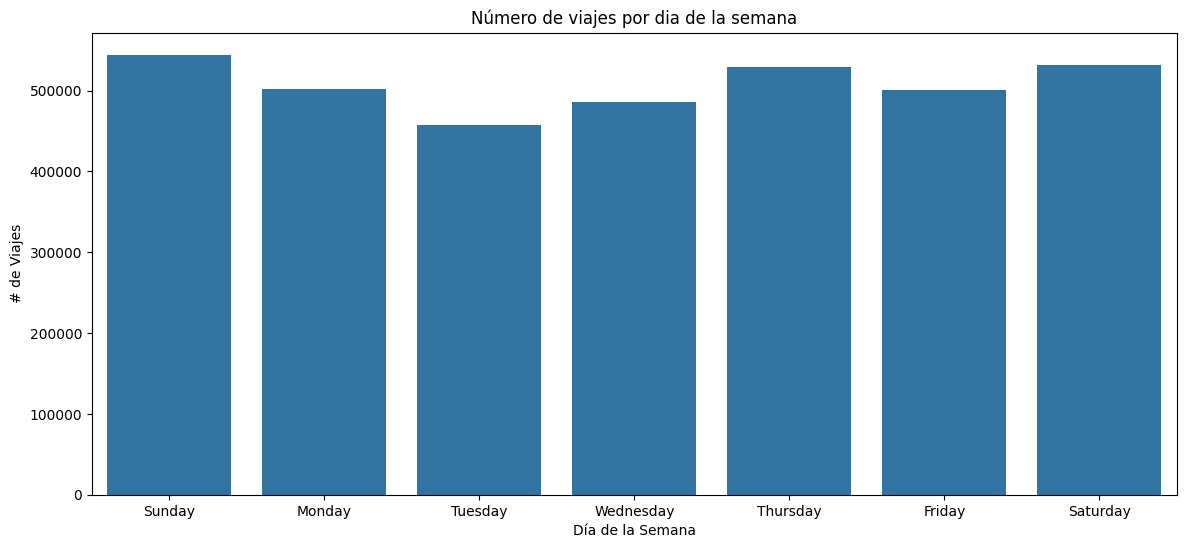

In [26]:
plt.rcParams["figure.figsize"] = (14,6)
sns.countplot(data=yellow_filtrado,x='weekday',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Número de viajes por dia de la semana') 
plt.xlabel('Día de la Semana')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que, en general, la cantidad de viajes durante la semana es homogénea, con un minimo los dias martes y máximos los días jueves y domingos

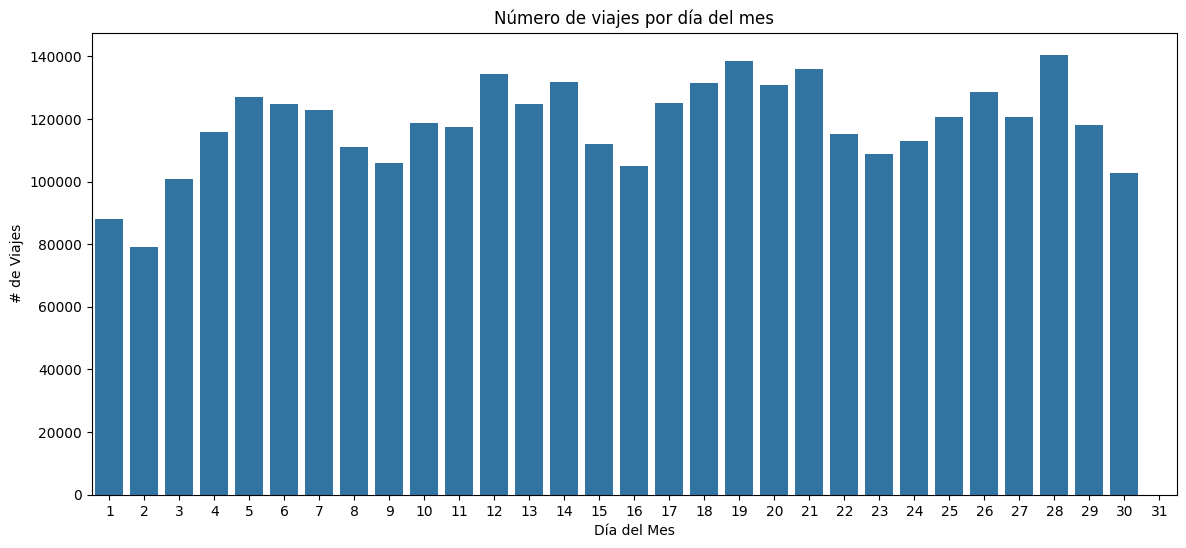

In [27]:
sns.countplot(data=yellow_filtrado,x=yellow_filtrado['tpep_pickup_datetime'].dt.day)
plt.title('Número de viajes por día del mes') 
plt.xlabel('Día del Mes')
plt.ylabel('# de Viajes')
plt.show()

### Se observa una tendencia oscilante que va acorde con el comportamiento de la cantidad de viajes observado durante los dias de la semana

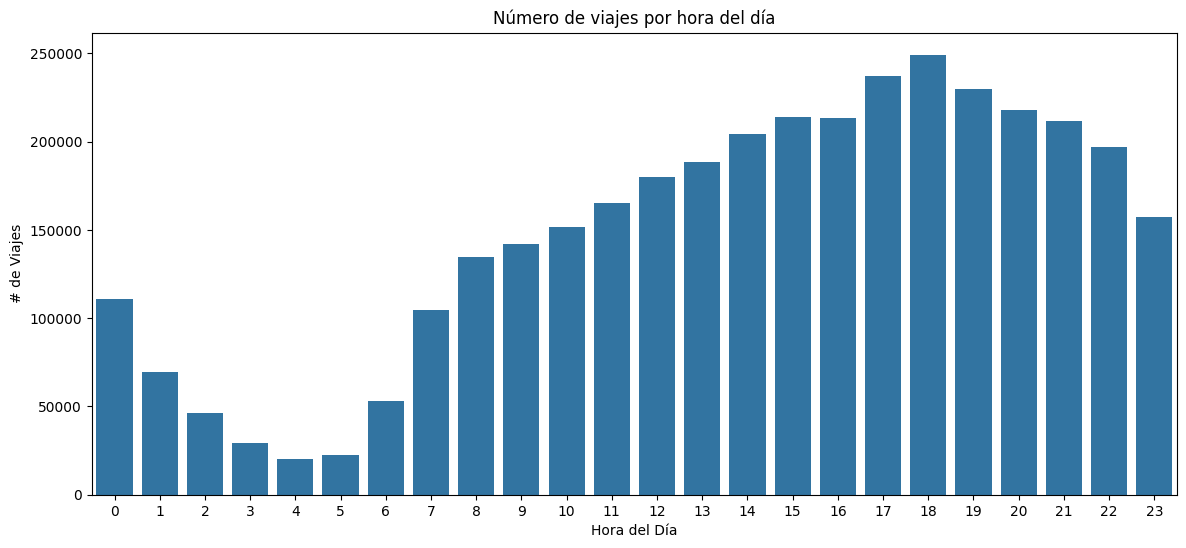

In [28]:
sns.countplot(data=yellow_filtrado,x=yellow_filtrado['tpep_pickup_datetime'].dt.hour)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### Al examinar el numero de viajes durante el día, comenzamos en un minimo de viajes a partir de las 4-5am que comienza a crecer hasta llegar a un pico a las 6pm, donde luego comienza a descender nuevamente.

In [29]:
yellow_time_transformed = yellow_filtrado.copy()

yellow_time_transformed['PU_dia']=yellow_time_transformed['tpep_pickup_datetime'].dt.day
yellow_time_transformed['PU_mes']=yellow_time_transformed['tpep_pickup_datetime'].dt.month
yellow_time_transformed['PU_hora']=yellow_time_transformed['tpep_pickup_datetime'].dt.hour
yellow_time_transformed['PU_dia_semana']=yellow_time_transformed['tpep_pickup_datetime'].dt.weekday
yellow_time_transformed['PU_año']=yellow_time_transformed['tpep_pickup_datetime'].dt.year

yellow_time_transformed.head(3)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:05:51,2024-09-01 00:45:03,9.80,138,48,0 days 00:39:12,15.000000,Sunday,1,9,0,6,2024
1,2024-09-01 00:59:35,2024-09-01 01:03:43,0.50,140,141,0 days 00:04:08,7.258065,Sunday,1,9,0,6,2024
2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.29,238,152,0 days 00:09:37,14.287695,Sunday,1,9,0,6,2024


In [30]:
trip_counts= yellow_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

trip_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,8,31,22,5,Saturday,1
1,2024,8,31,23,5,Saturday,30
2,2024,9,1,0,6,Sunday,4133
3,2024,9,1,1,6,Sunday,3195
4,2024,9,1,2,6,Sunday,2475
...,...,...,...,...,...,...,...
727,2024,10,1,16,1,Tuesday,1
728,2024,10,1,18,1,Tuesday,2
729,2024,10,1,19,1,Tuesday,2
730,2024,10,1,20,1,Tuesday,1


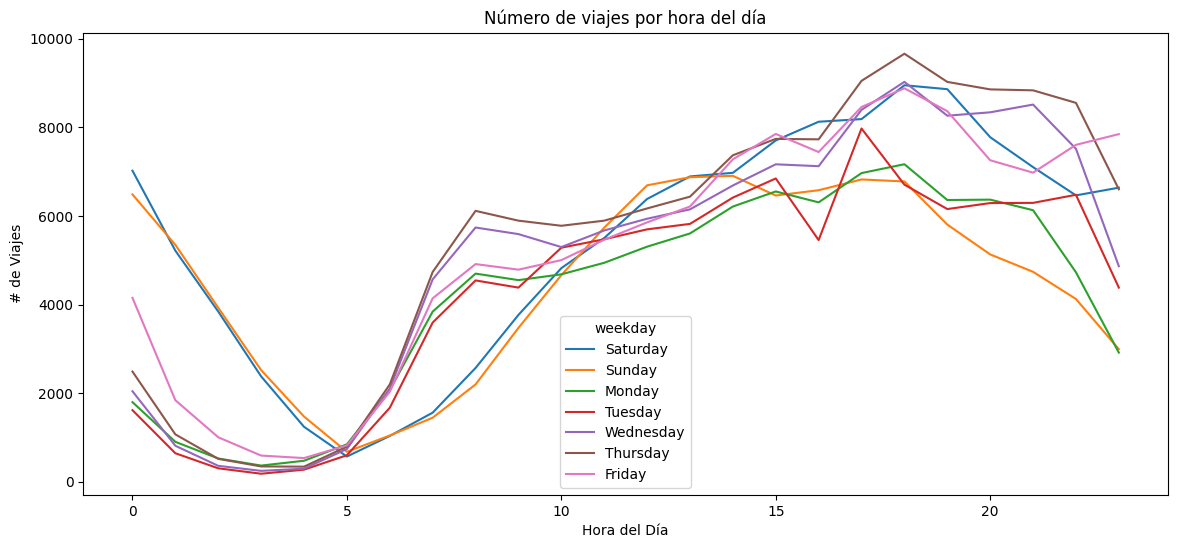

In [31]:
sns.lineplot(data=trip_counts,x=trip_counts['PU_hora'],y=trip_counts['Count'],hue=trip_counts['weekday'],errorbar=None)
plt.title('Número de viajes por hora del día') 
plt.xlabel('Hora del Día')
plt.ylabel('# de Viajes')
plt.show()

### **Al examinar el numero de viajes durante el día, pero separando segun el dia de la semana, podemos observar que hay una diferencia clara, en especial en las primeras horas del dia, entre los dia de semana (Lun-Vie) y los fines de semana (Sab-Dom).**

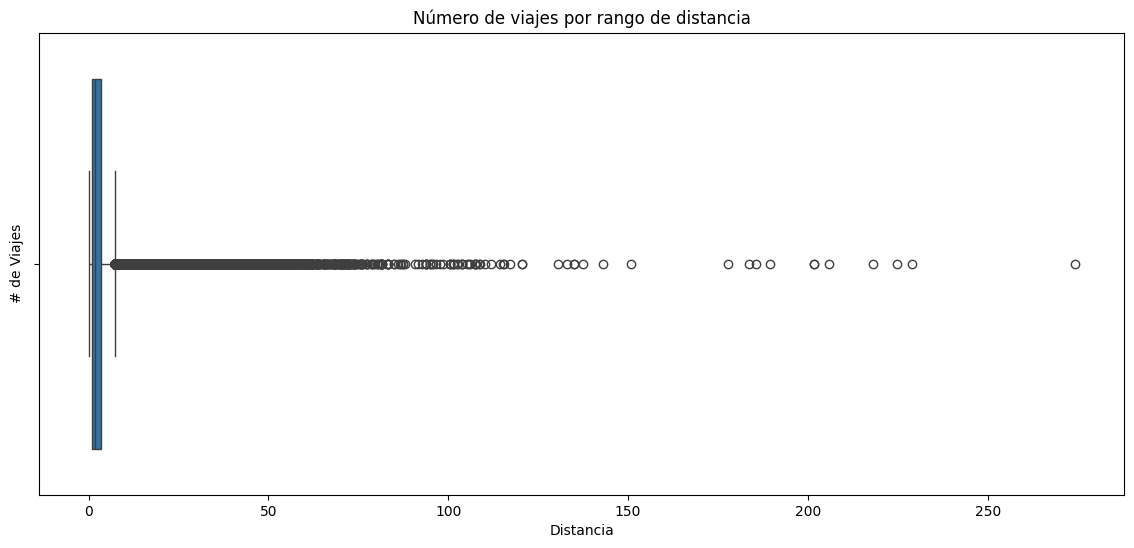

In [32]:
sns.boxplot(x=yellow_filtrado['trip_distance'])
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Para las distancias recorridas, claramente se ve que hay valores que distorsionan fuertemente el diagrama
### Se realizara un filtro donde se conservara solamente aquellos valores razonables

In [33]:
yellow_filtrado['trip_distance'].describe()

count    3.550472e+06
mean     3.540234e+00
std      4.572061e+00
min      1.000000e-02
25%      1.090000e+00
50%      1.840000e+00
75%      3.580000e+00
max      2.742500e+02
Name: trip_distance, dtype: float64

### Debido a la influencia de los outliers, nos quedaremos con el percentil 90

In [34]:
quantile_90 = yellow_filtrado[yellow_filtrado['trip_distance'] <= yellow_filtrado['trip_distance'].quantile(0.90)]['trip_distance'].reset_index(drop=True)
quantile_90.describe()

count    3.196192e+06
mean     2.240935e+00
std      1.817595e+00
min      1.000000e-02
25%      1.010000e+00
50%      1.670000e+00
75%      2.800000e+00
max      9.200000e+00
Name: trip_distance, dtype: float64

### Ahora nuestro maximo pasó de 274.25 millas a 9.2. Graficaremos para observar la distribucion de caja.

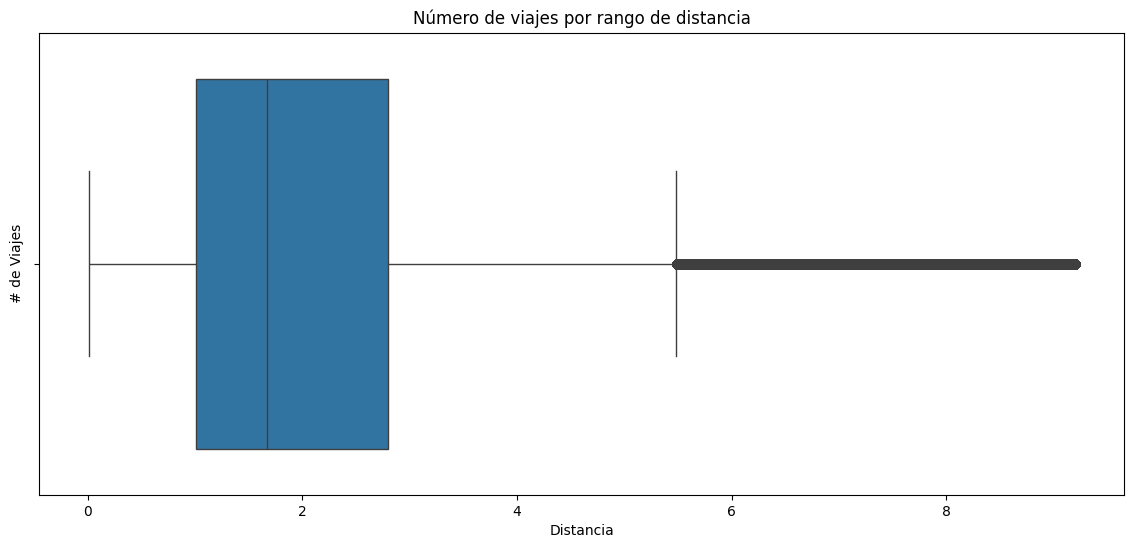

In [35]:
sns.boxplot(x=quantile_90)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Aquí se observa una distribución mas razonable. Con este nuevo rango se pueden visualizar los histogramas:

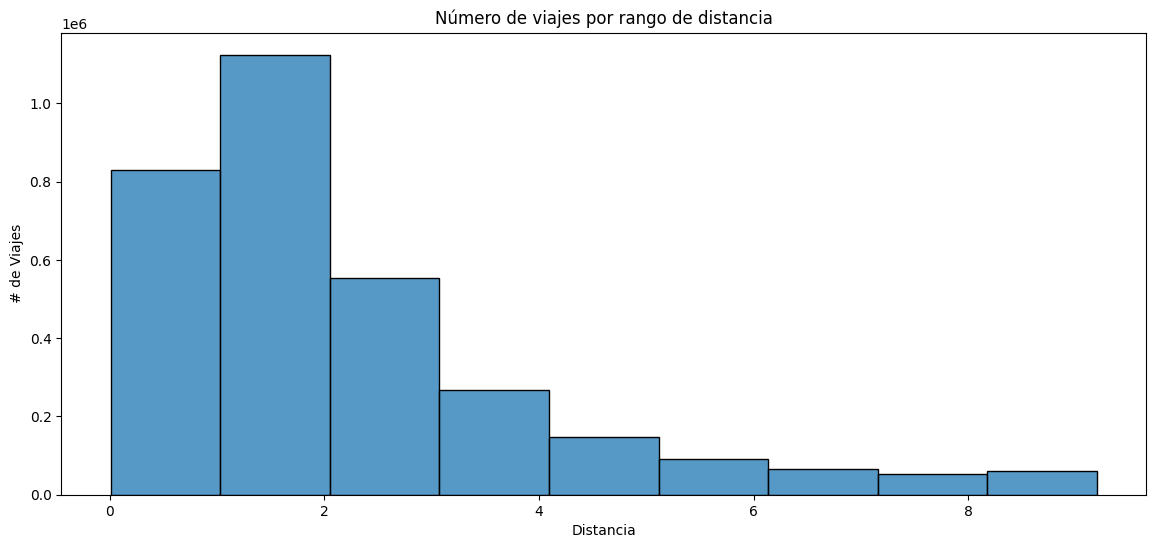

In [36]:
sns.histplot(data=quantile_90, binwidth=1)
plt.title('Número de viajes por rango de distancia') 
plt.xlabel('Distancia')
plt.ylabel('# de Viajes')
plt.show()

### Se observa que la gran mayoria se encuentra en las primeras 4 millas.

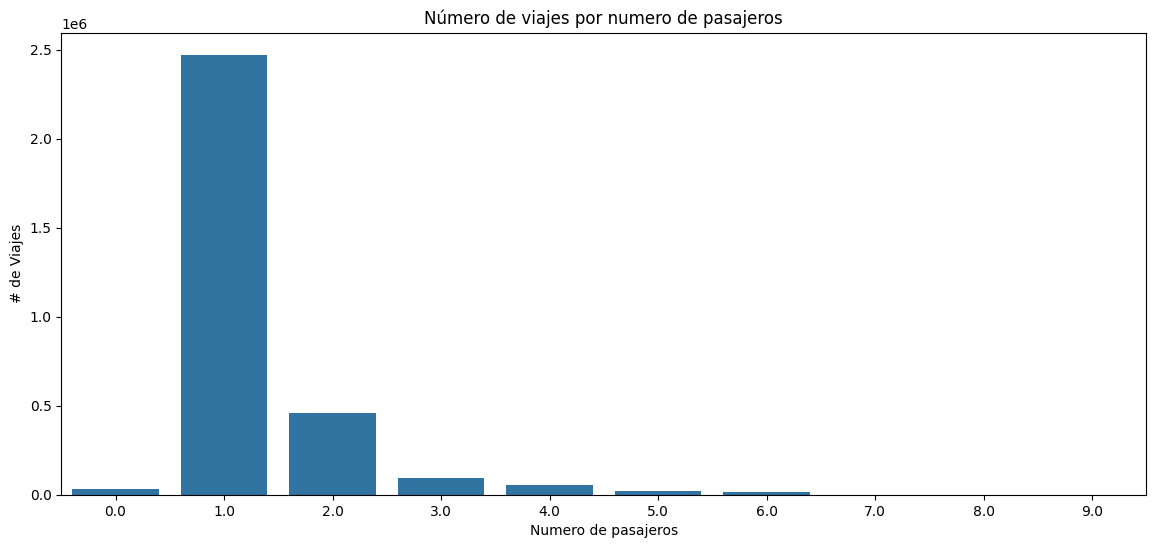

In [37]:
sns.countplot(data=raw_yellow_tripdata,x='passenger_count')
plt.title('Número de viajes por numero de pasajeros') 
plt.xlabel('Numero de pasajeros')
plt.ylabel('# de Viajes')
plt.show()

### Acá se observa que la gran mayoría de los viajes son de 1 solo pasajero. Se observa también viajes de "cero" pasajeros. La fuente de datos indica que este valor es introducido por el conductor, puede significar un error o representar un "envío de paquete" en el caso de que la compañía ofrezca ese servicio.

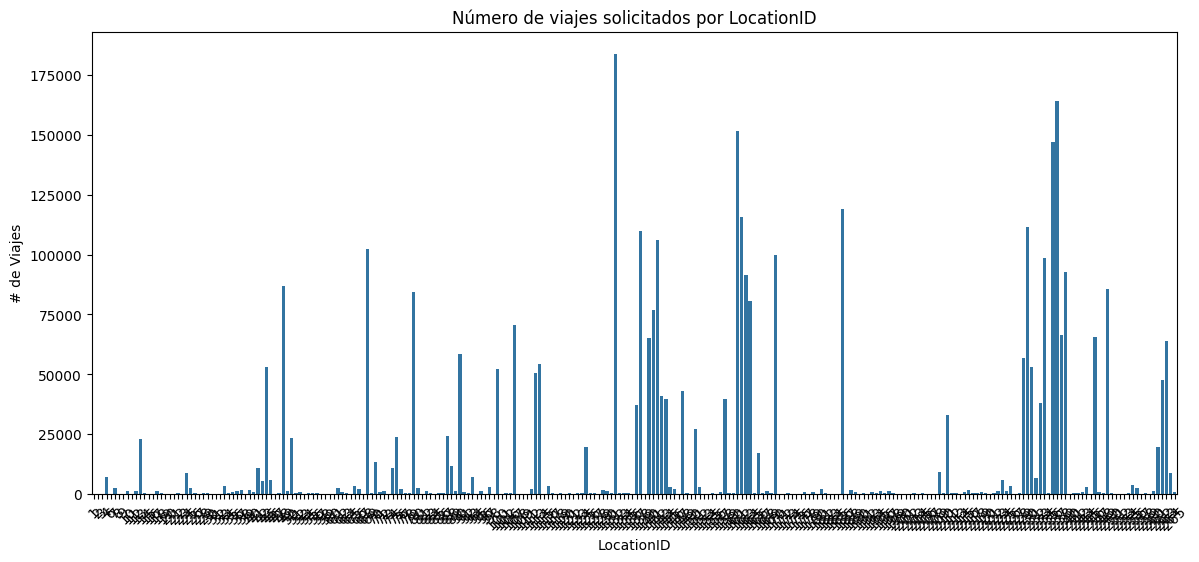

In [38]:
sns.countplot(data=yellow_filtrado,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

### Acá se puede observar la cantidad de viajes solicitados por zona de NY. Al tener tantas zonas el grafico esta muy saturado, pero se puede observar claramente ciertas zonas donde claramente hay mayor demanda. A continuación se filtrará la data para obtener solo aquellos con un numero alto de solicitudes.

El siguiente filtro es para quedarnos con las filas que tengan los LocationID donde la suma de los viajes solicitados en dichos LocationID es mayor a 25000.

In [39]:
conteo_25000 = yellow_filtrado.groupby('PULocationID').filter(lambda x: len(x) >= 25000).copy().reset_index()
# yellow_tripdata_sample[yellow_tripdata_sample['PULocationID'].isin(yellow_tripdata_sample['PULocationID'].value_counts()[yellow_tripdata_sample['PULocationID'].value_counts()>25000].index)]
# Forma secundaria

conteo_25000

,index,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday
0,0,2024-09-01 00:05:51,2024-09-01 00:45:03,9.80,138,48,0 days 00:39:12,15.000000,Sunday
1,1,2024-09-01 00:59:35,2024-09-01 01:03:43,0.50,140,141,0 days 00:04:08,7.258065,Sunday
2,2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.29,238,152,0 days 00:09:37,14.287695,Sunday
3,4,2024-09-01 00:11:57,2024-09-01 00:30:41,2.26,79,231,0 days 00:18:44,7.238434,Sunday
4,5,2024-09-01 00:30:13,2024-09-01 00:36:44,1.20,43,239,0 days 00:06:31,11.048593,Sunday
...,...,...,...,...,...,...,...,...,...
3163749,3550455,2024-09-30 23:03:02,2024-09-30 23:24:31,5.83,68,74,0 days 00:21:29,16.282389,Monday
3163750,3550459,2024-09-30 23:13:53,2024-09-30 23:33:00,2.96,186,232,0 days 00:19:07,9.290323,Monday
3163751,3550460,2024-09-30 23:07:32,2024-09-30 23:17:08,1.61,114,13,0 days 00:09:36,10.062500,Monday
3163752,3550462,2024-09-30 23:21:00,2024-09-30 23:32:00,2.20,230,90,0 days 00:11:00,12.000000,Monday


In [40]:
yellow_filtrado['PULocationID'].nunique()

258

In [41]:
yellow_filtrado['PULocationID'].value_counts()[yellow_filtrado['PULocationID'].value_counts()>=25000].shape

(40,)

### De lo anterior se observa que de los 258 diferentes LocationID, en 40 de ellos es donde se concentra la mayoría de las solicitudes

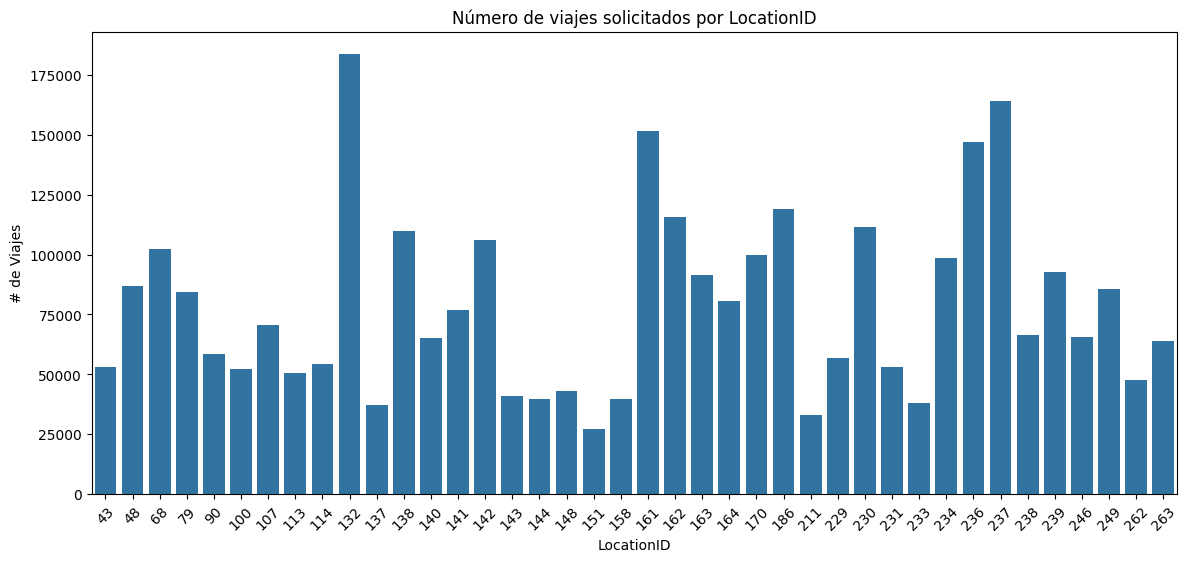

In [42]:
sns.countplot(data=conteo_25000,x='PULocationID')
plt.title('Número de viajes solicitados por LocationID') 
plt.xlabel('LocationID')
plt.ylabel('# de Viajes')
plt.xticks(rotation=45)
plt.show()

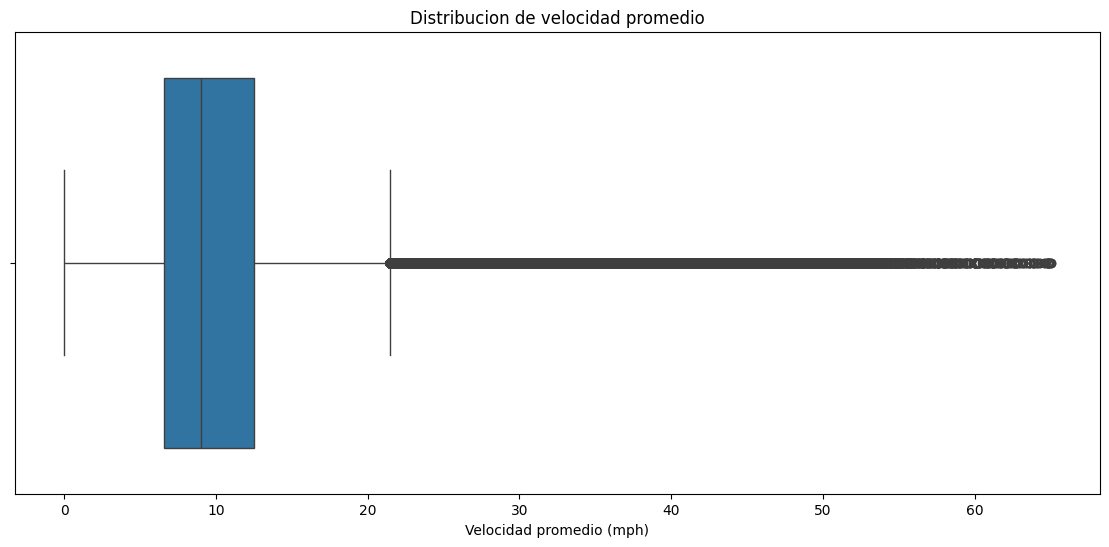

In [43]:
sns.boxplot(x=yellow_filtrado['avg_speed'])
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.show()

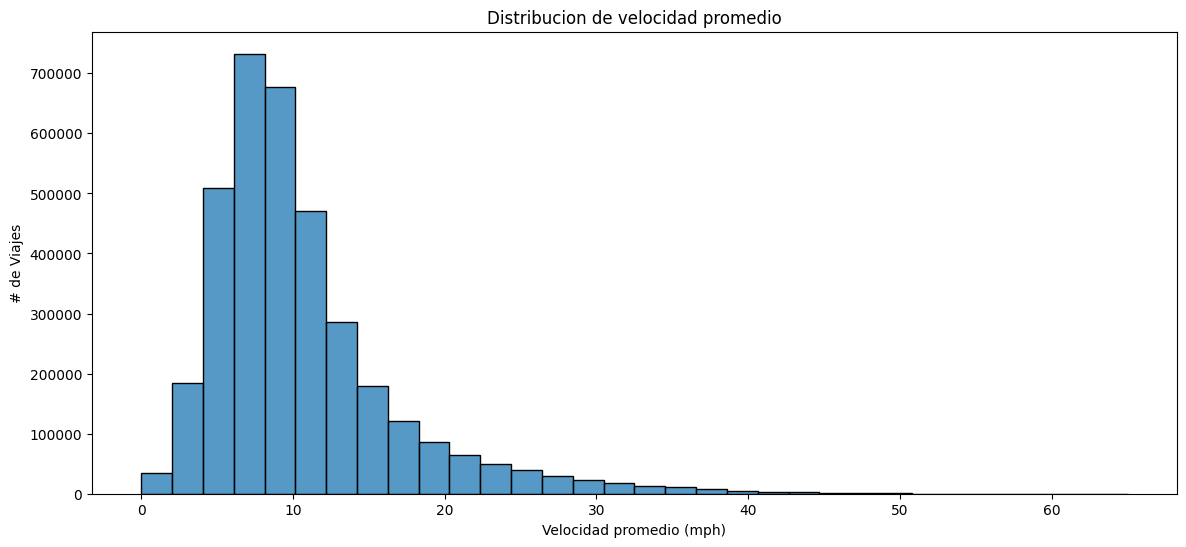

In [44]:
sns.histplot(data=yellow_filtrado['avg_speed'], binwidth=2)
plt.title('Distribucion de velocidad promedio') 
plt.xlabel('Velocidad promedio (mph)')
plt.ylabel('# de Viajes')
plt.show()

In [45]:
yellow_filtrado['avg_speed'].describe()

count    3.550472e+06
mean     1.055392e+01
std      6.297260e+00
min      4.172558e-04
25%      6.570796e+00
50%      9.011378e+00
75%      1.252358e+01
max      6.500000e+01
Name: avg_speed, dtype: float64

### Se observa una distribucion donde el 50% de los viajes oscilan a una velocidad promedio entre 6.57 y 12.52 mph.

In [46]:
discarded_rows = raw_yellow_tripdata.shape[0]-yellow_filtrado.shape[0]

discarded_rows

82555

### Acá se contabilizan las filas que se consideran de calidad y aquellas que han sido descartadas bajo el criterio de velocidad promedio y distancias y tiempos 0 o negativos.

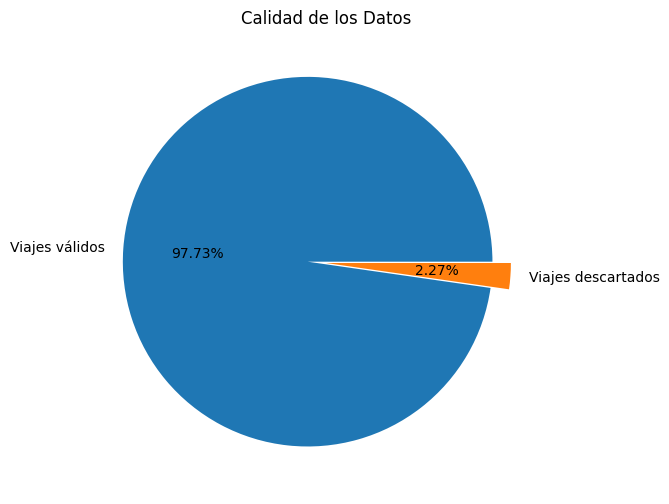

In [47]:
data = [yellow_filtrado.shape[0], discarded_rows]
keys = ['Viajes válidos', 'Viajes descartados']
plt.title('Calidad de los Datos') 
plt.pie(data, labels=keys,explode=[0.1,0], autopct='%.2f%%')
plt.show()

## Se tiene que luego de los filtros realizados, casi un 98% de la data es de calidad.

Ahora queremos observar las correlaciones entre las variables, para ello agruparemos segun la ubicación.

In [48]:
yellow_time_transformed.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,trip_time,avg_speed,weekday,PU_dia,PU_mes,PU_hora,PU_dia_semana,PU_año
0,2024-09-01 00:05:51,2024-09-01 00:45:03,9.80,138,48,0 days 00:39:12,15.000000,Sunday,1,9,0,6,2024
1,2024-09-01 00:59:35,2024-09-01 01:03:43,0.50,140,141,0 days 00:04:08,7.258065,Sunday,1,9,0,6,2024
2,2024-09-01 00:25:00,2024-09-01 00:34:37,2.29,238,152,0 days 00:09:37,14.287695,Sunday,1,9,0,6,2024
3,2024-09-01 00:31:00,2024-09-01 00:46:52,5.20,93,130,0 days 00:15:52,19.663866,Sunday,1,9,0,6,2024
4,2024-09-01 00:11:57,2024-09-01 00:30:41,2.26,79,231,0 days 00:18:44,7.238434,Sunday,1,9,0,6,2024


In [49]:
location_counts= yellow_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday','PULocationID'])\
                                .agg(Count=('PULocationID','count'))\
                                .reset_index()

location_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,PULocationID,Count
0,2024,8,31,22,5,Saturday,141,1
1,2024,8,31,23,5,Saturday,24,2
2,2024,8,31,23,5,Saturday,48,1
3,2024,8,31,23,5,Saturday,68,1
4,2024,8,31,23,5,Saturday,79,3
...,...,...,...,...,...,...,...,...
90371,2024,10,1,18,1,Tuesday,188,1
90372,2024,10,1,19,1,Tuesday,141,1
90373,2024,10,1,19,1,Tuesday,237,1
90374,2024,10,1,20,1,Tuesday,186,1


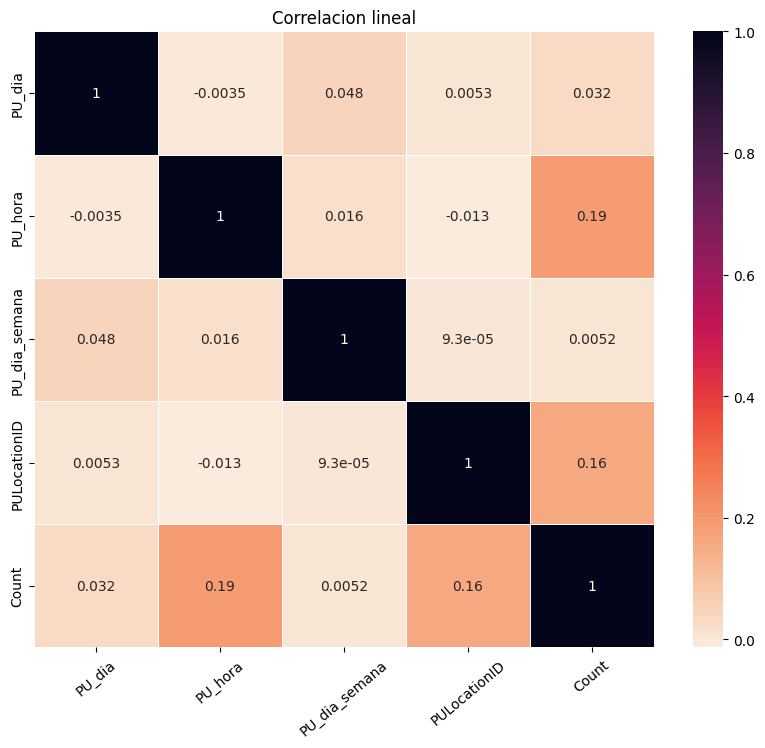

In [50]:
time_location_corr = location_counts[[ 'PU_dia', 'PU_hora', 'PU_dia_semana','PULocationID', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_location_corr, annot=True, linewidth=.5,cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

### Se observa que los atributos que mayor correlacion presentan son la hora y la ubicacion.

### Ahora solo tomaremos en cuenta el conteo total de viajes, independiente de las ubicaciones.

In [51]:
time_counts= yellow_time_transformed.groupby(['PU_año', 'PU_mes','PU_dia','PU_hora','PU_dia_semana','weekday'])\
                                .agg(Count=('PU_hora','count'))\
                                .reset_index()

time_counts

,PU_año,PU_mes,PU_dia,PU_hora,PU_dia_semana,weekday,Count
0,2024,8,31,22,5,Saturday,1
1,2024,8,31,23,5,Saturday,30
2,2024,9,1,0,6,Sunday,4133
3,2024,9,1,1,6,Sunday,3195
4,2024,9,1,2,6,Sunday,2475
...,...,...,...,...,...,...,...
727,2024,10,1,16,1,Tuesday,1
728,2024,10,1,18,1,Tuesday,2
729,2024,10,1,19,1,Tuesday,2
730,2024,10,1,20,1,Tuesday,1


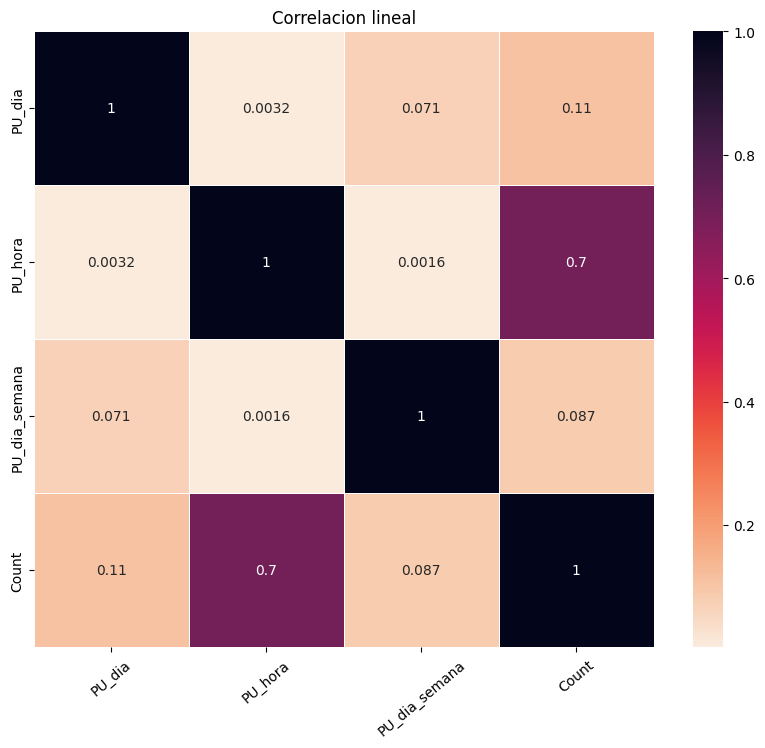

In [52]:
time_corr = time_counts[['PU_dia', 'PU_hora', 'PU_dia_semana', 'Count']].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(time_corr, annot=True, linewidth=.5, cmap='rocket_r')
plt.title('Correlacion lineal') 
plt.xticks(rotation=40)
plt.show()

## Se corrobora la influencia que tiene la hora del dia en la demanda de taxis